# A Team's Web & Mobile Jobs

This project is to analyse the trends of a software development group. This group requested me to analyse and find some insight from their working history. 

They has worked with Canadian clients for several years. They informed me that some parts of data had been eliminated for the security reason.

## Load and clean the data

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

raw_data = pd.read_csv('canada_jobs.csv')
raw_data.head()

,Category,Skills,Date,Budget
0,iOS,Object C,10/25/2015,2000
1,windows,MFC,10/28/2015,NaN
2,iOS,Objective-C,11/1/2015,4500
3,Android,Java,12/1/2015,500
4,Android,Java,12/10/2015,2000


In [69]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 4 columns):
Category    389 non-null object
Skills      389 non-null object
Date        389 non-null object
Budget      292 non-null object
dtypes: object(4)
memory usage: 12.2+ KB


There are some to be cleaned: (1) nearly 100 rows has NaN in Budget column, (2) Date column is not a date type but object, (3) some skills in Skills column has different strings for the same thing.

In [70]:
# convert Date column from str to datetime
raw_data['Date'] = pd.to_datetime(raw_data['Date'], format='%m/%d/%Y')

In [71]:
# deal with Skills
raw_data['Skills'].value_counts()

Java                                             69
Objective-C                                      32
Swift4                                           22
Objective-c                                      18
wordpress                                        15
PHP                                              11
Objective C                                      10
Java,Swift3                                       9
html, javascript                                  7
html5, javascript                                 6
Swift                                             6
Cesium.js                                         5
Swift 3                                           5
Object C                                          5
Swift 3.0                                         4
Laravel                                           4
SWIFT 3.0                                         4
Swift3                                            4
MFC                                               4
Fabric.js, h

In [72]:
raw_data['Skills'] = (raw_data['Skills']
    .str.lower().str.replace('object c', 'objective-c')
    .str.lower().str.replace('objective c', 'objective-c')
    .str.replace(', ', ',')
 )

In [73]:
raw_data['Budget'] = raw_data['Budget'].str.replace('$', '').astype(float)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 4 columns):
Category    389 non-null object
Skills      389 non-null object
Date        389 non-null datetime64[ns]
Budget      292 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.2+ KB


## Category chart

In [74]:
raw_data['Category'].value_counts()

Web            122
iOS            121
Android         73
web             36
iOS/Android     16
macOS            5
windows          5
Other            4
Windows          4
other            2
IOS              1
Name: Category, dtype: int64

In [75]:
raw_data['Category'] = raw_data['Category'].str.lower()
raw_data['Category'].value_counts()

web            158
ios            122
android         73
ios/android     16
windows          9
other            6
macos            5
Name: Category, dtype: int64

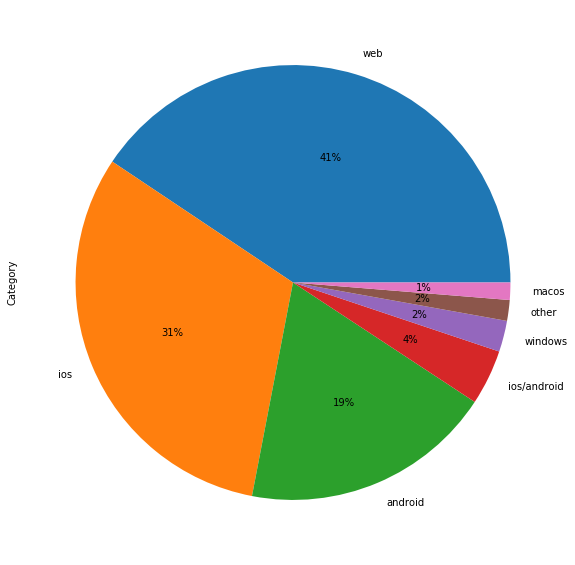

In [76]:
plt.figure(figsize=(10, 10))
raw_data['Category'].value_counts().plot.pie(autopct='%1.0f%%')

It shows that 51% of the jobs are mobile app, 41% for web app and 5% for desktop applications.

## Skills

In [87]:
raw_data['Skills_clean'] = (raw_data['Skills']
                      .str.replace('/', ',')
                      .str.replace('angular4', 'angular')
                      .str.replace('angularjs', 'angular')
                      .str.replace('angular cli', 'angular')
                      .str.replace('asp .net', 'asp.net')
                      .str.replace('asp.net mvc', 'asp.net')
                      .str.replace('bpmn-js', 'bpmn.js')
                      .str.replace('cake php', 'cakephp')
                      .str.replace('cesium.js', 'cesium')
                      .str.replace('css3d', 'css')
                      .str.replace('css3', 'css')
                      .str.replace('fabric js', 'fabric.js')
                      .str.replace('html5 game', 'html')
                      .str.replace('html5', 'html')
                      .str.replace('node.js', 'node')
                      .str.replace('node js', 'node')
                      .str.replace('react.js', 'react')
                      .str.replace('react js', 'react')
                      .str.replace('reactjs', 'react')
                      .str.replace('ruby on rails', 'ruby')
                      .str.replace('ruby germs', 'ruby')
                      .str.replace('cesium', 'cesium.js')
                      .str.replace('swift 2.3', 'swift')
                      .str.replace('swift 3.0', 'swift')
                      .str.replace('swift 3', 'swift')
                      .str.replace('swift 4.0', 'swift')
                      .str.replace('swift 4.2', 'swift')
                      .str.replace('swift3', 'swift')
                      .str.replace('swift 4', 'swift')
                      .str.replace('swift4', 'swift')
                      .str.replace('swift2.2', 'swift')
                      .str.replace('yii2', 'yii')
                     )
skills = {}
for skill in raw_data['Skills_clean'].tolist():
    sklist = skill.split(',')
    for s in sklist:
        if s in skills:
            skills[s] += 1
        else:
            skills[s] = 1
skill_series = pd.DataFrame.from_dict(skills, orient='index')

In [106]:
skill_brief = skill_series[skill_series[0] > 10]
skill_brief.loc['others'] = skill_series[skill_series[0] <= 10].sum()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


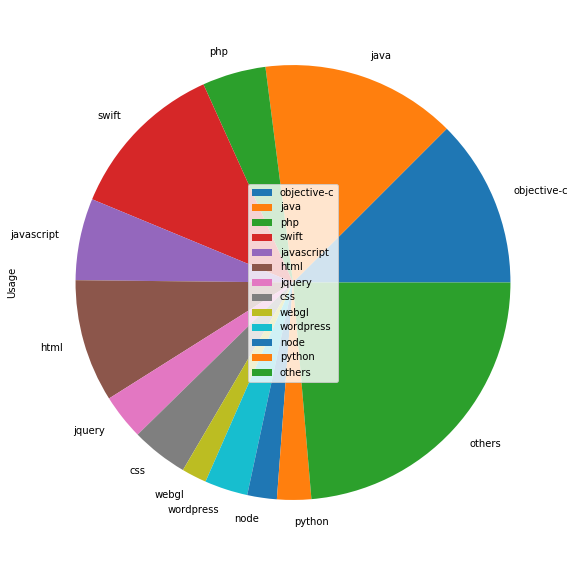

In [116]:
skill_brief.columns = ['Usage']
skill_brief.plot.pie(y='Usage', figsize=(15, 10))
plt.legend(loc="center")

## Budget Analysis

In [124]:
budget = raw_data.dropna(axis=0)
budget['BigCategory'] = (budget['Category']
                     .str.replace('ios/android', 'mobile')
                     .str.replace('android', 'mobile')
                     .str.replace('ios', 'mobile')
                     )
budget.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Category,Skills,Date,Budget,Skills_clean,BigCategory
0,ios,objective-c,2015-10-25,2000.0,objective-c,mobile
2,ios,objective-c,2015-11-01,4500.0,objective-c,mobile
3,android,java,2015-12-01,500.0,java,mobile
4,android,java,2015-12-10,2000.0,java,mobile
6,android,java,2015-12-20,1000.0,java,mobile


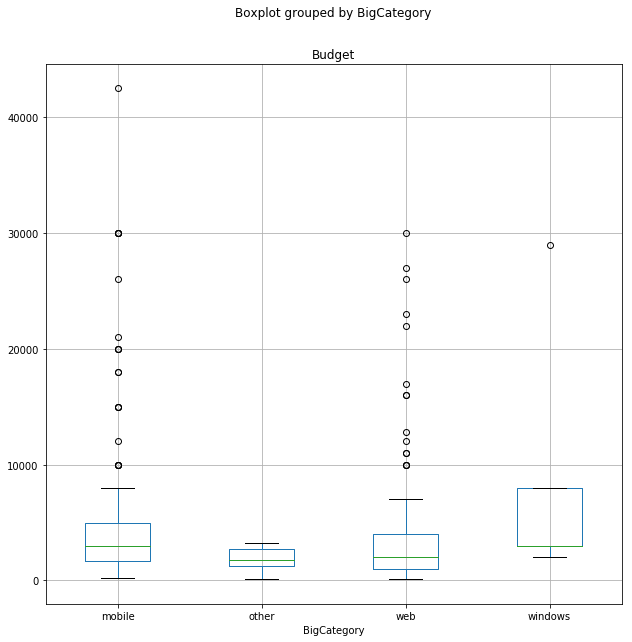

In [128]:
budget.boxplot('Budget', by='BigCategory', figsize=(10, 10))

In [130]:
budget.groupby(by='BigCategory').agg(np.mean)

,Budget
BigCategory,
mobile,4922.549020
other,1833.333333
web,4005.390625
windows,9000.000000


In [137]:
mobile_budgets = budget[budget['BigCategory'] == 'mobile']
web_budgets = budget[budget['BigCategory'] == 'web']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cdb6b4ef0>]],
      dtype=object)

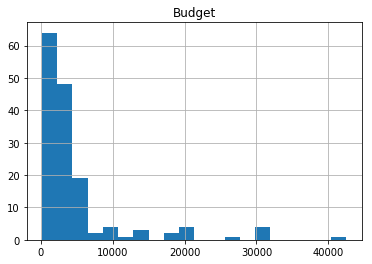

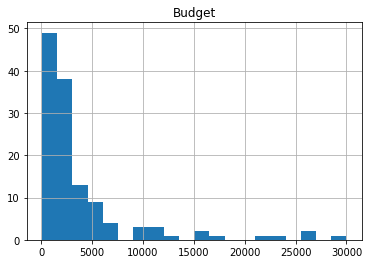

In [140]:
mobile_budgets.hist(bins=20)
web_budgets.hist(bins=20)

** The box plot and histogram show that mobile and web are no so different in price **

In [158]:
budget['YearMonth'] = budget['Date'].map(lambda dt: dt.replace(day=1))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, '')

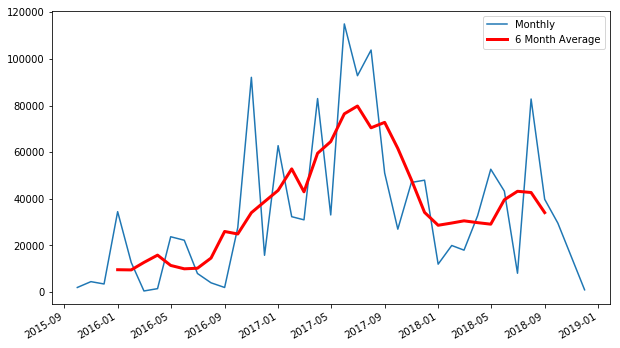

In [174]:
ts = budget.groupby(by='YearMonth').agg({'Budget': 'sum'})
roll = ts.rolling(6, center=True).mean()

ax = ts.plot(y='Budget', label='Monthly', figsize=(10, 6))
roll.plot(y='Budget', label='6 Month Average', color='red',linewidth=3.0, ax=ax)
ax.set_xlabel('')

This result shows that the groups revenue had been increased in 2016 and its peak was 2017, but from 2018 the revenue started to make a descent.

## Conclusion

The team has been working for web and mobile applications mainly and some computer graphics minorly.
The revenue of team started to grow in 2016 and took its peak in 2017, and began to make a descent in 2018. It shows that they need some change.